# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.121595e+01     7.411112e+00
 * time: 0.004412174224853516
     1     2.894412e+01     7.022091e+00
 * time: 0.011753082275390625
     2     1.660676e+01     4.273482e+00
 * time: 0.03580617904663086
     3     1.252985e+01     2.261972e+00
 * time: 0.057229042053222656
     4     1.131081e+01     1.847239e+00
 * time: 0.0777280330657959
     5     1.061967e+01     1.083734e+00
 * time: 0.09373807907104492
     6     1.009513e+01     1.041772e+00
 * time: 0.11054110527038574
     7     9.728420e+00     6.713140e-01
 * time: 0.12700200080871582
     8     9.512678e+00     5.776624e-01
 * time: 0.1432960033416748
     9     9.394885e+00     5.791834e-01
 * time: 0.1587660312652588
    10     9.281091e+00     4.837666e-01
 * time: 0.17399311065673828
    11     9.202970e+00     7.307996e-01
 * time: 0.18564820289611816
    12     9.124889e+00     3.718114e-01
 * time: 0.19782304763793945
    13     9.067537e+00     3.545452e-01
 * time:

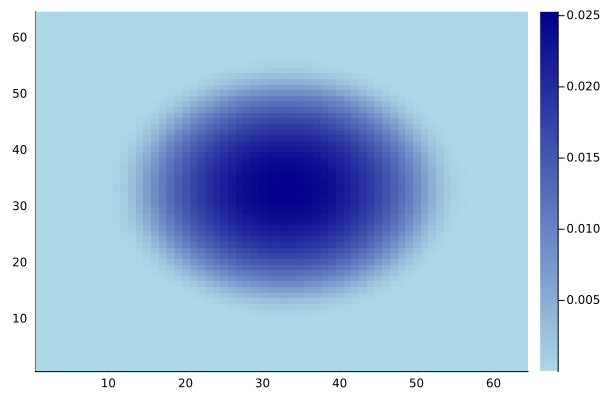

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)